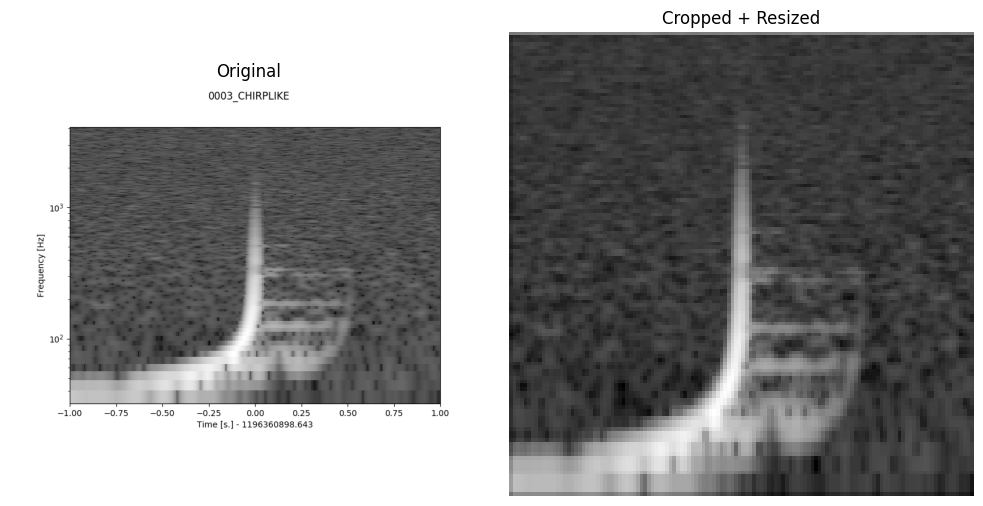

In [16]:
import os
import sys
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

# Ensure src/ is in the Python path
sys.path.append("../src")

from data_loader import CropSpectrogramPlot

# Path to a PNG file (replace with your actual image path)
img_path = "../data/png/train/CHIRPLIKE/0003_CHIRPLIKE_spec_plot.png"

# Load image
image = Image.open(img_path).convert("L")

# Define transforms
original_transform = transforms.ToTensor()
crop_transform = transforms.Compose([
    CropSpectrogramPlot(crop_box=(100, 70, 720, 535)),
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Apply transforms
original_tensor = original_transform(image)
cropped_tensor = crop_transform(image)

# Plot original and cropped
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(original_tensor.squeeze(), cmap="gray")
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(cropped_tensor.squeeze(), cmap="gray")
axes[1].set_title("Cropped + Resized")
axes[1].axis("off")

plt.tight_layout()
plt.show()
